In [1]:
import cv2

In [108]:
flags = [i for i in dir(cv2) if i.startswith('IMREAD_')]

In [109]:
flags

['IMREAD_ANYCOLOR',
 'IMREAD_ANYDEPTH',
 'IMREAD_COLOR',
 'IMREAD_GRAYSCALE',
 'IMREAD_IGNORE_ORIENTATION',
 'IMREAD_LOAD_GDAL',
 'IMREAD_REDUCED_COLOR_2',
 'IMREAD_REDUCED_COLOR_4',
 'IMREAD_REDUCED_COLOR_8',
 'IMREAD_REDUCED_GRAYSCALE_2',
 'IMREAD_REDUCED_GRAYSCALE_4',
 'IMREAD_REDUCED_GRAYSCALE_8',
 'IMREAD_UNCHANGED']

In [113]:
img = cv2.imread('1.jpg', cv2.IMREAD_UNCHANGED)

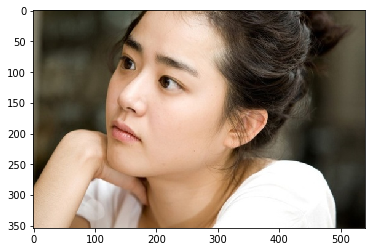

In [130]:
plt.imshow(img[:,:,::-1])

In [137]:
b,g,r = cv2.split(img)

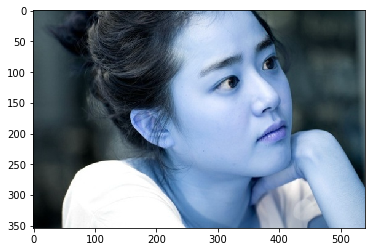

In [153]:
plt.imshow(np.fliplr(img[:,:,:]))

```
cv2.IMREAD_COLOR : alpha channel 무시 / Default
cv2.IMREAD_GRAYSCALE
cv2.IMREAD_UNCHANGED : 이미지파일을 alpha channel까지 포함
```

In [4]:
 cv2.imwrite('2.png', img)

True

In [7]:
import matplotlib.pyplot as plt

([], <a list of 0 Text yticklabel objects>)

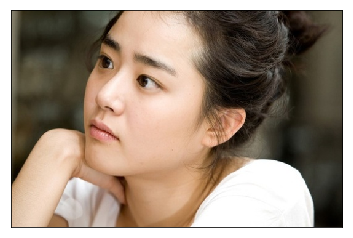

In [8]:
b, g, r = cv2.split(img)   
img2 = cv2.merge([r,g,b]) 

plt.imshow(img2)
plt.xticks([]) 
plt.yticks([]) 

In [160]:
img3 = np.zeros((512, 512, 3), np.uint8)
img3 = cv2.line(img3, (0, 0), (511, 511), (255, 0, 0, 1), 5)

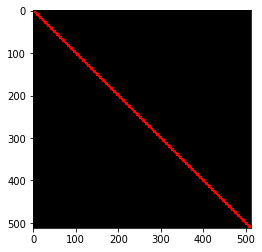

In [161]:
plt.imshow(img3)

In [21]:
img4 = np.zeros((512, 512, 3), np.uint8)
img4 = cv2.rectangle(img4, (384, 0), (510, 128), (0,255,0), 3)

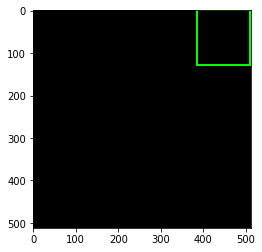

In [22]:
plt.imshow(img4)

In [23]:
img5 = np.zeros((512, 512, 3), np.uint8)
img5 = cv2.circle(img5, (447,63), 63, (0,0,255), -1)

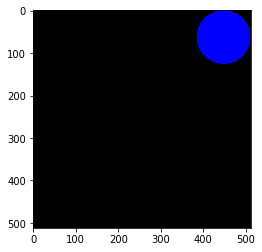

In [24]:
plt.imshow(img5)

In [177]:
img6 = np.zeros((512, 512, 3), np.uint8)
pts = np.array([[10,5], [20,30], [70,20], [50,10]], np.int32) # 각 꼭지점은 2차원 행렬로 선언
# 이미지에 표현하기 위해 3차원 행렬로 변환. 변환이전과 이후의 행렬 갯수는 동일해야함.
# -1은 원본에 해당하는 값을 그대로 유지.

In [178]:
pts

array([[[10,  5]],

       [[20, 30]],

       [[70, 20]],

       [[50, 10]]], dtype=int32)

In [179]:
img = cv2.polylines(img6, [pts], True, (0,255,255))

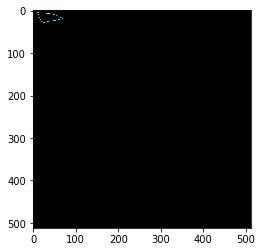

In [180]:
plt.imshow(img6)

In [181]:
img7 = np.zeros((512, 512, 3), np.uint8)
img7 = cv2.putText(img7, 'MOON', (10,500), cv2.FONT_HERSHEY_SIMPLEX, 4, (255,255,255), 2)

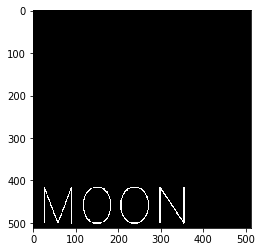

In [182]:
plt.imshow(img7)

```
https://stackoverflow.com/questions/18942605/how-to-use-unicode-characters-with-pil/22612295#22612295
```

In [29]:
img.item(10,10,2) # Red값

0

In [31]:
img.itemset((10,10,2), 100)
img.item(10,10,2)

100

In [38]:
img8 = cv2.imread('1.jpg', 1)
ball = img8[100:200, 100:200] # img[행의 시작점: 행의 끝점, 열의 시작점: 열의 끝점]
img8[200:300,200:300] = ball # 동일 영역에 Copy

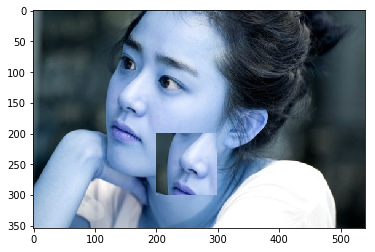

In [39]:
plt.imshow(img8)

```
Saturation연산은 한계값을 정하고 그 값을 벗어나는 경우는 모두 특정 값으로 계산하는 방식
이미지에서는 0이하는 모두 0, 255이상은 모두 255로 표현

modulo연산은 a와 b는 n으로 나눈 나머지 값이 같다라는 의미
ex) 시계 - 2와 14는 12로 나눈 나머지가 2로 동일
이미지에서는 연산의 결과가 256보다 큰 경우는 256으로 나눈 나머지 값으로 결정
```

In [42]:
x = cv2.add(img,img) # Saturation 연산

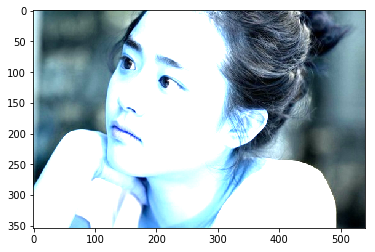

In [43]:
plt.imshow(x)

In [44]:
y = img + img

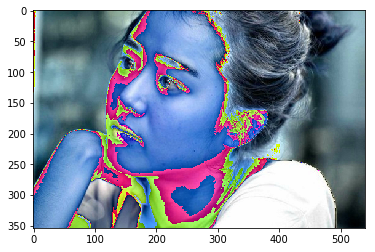

In [45]:
plt.imshow(y)

In [184]:
[i for i in dir(cv2) if i.startswith('THRESH_')]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [188]:
np.max(img, 2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [189]:
img = cv2.imread('1.jpg',1)

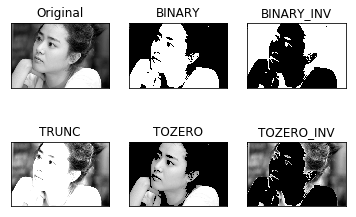

In [191]:
img = cv2.imread('1.jpg',0)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
	plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

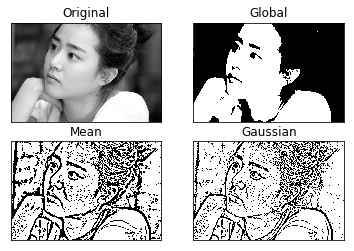

In [53]:
img = cv2.imread('1.jpg',0)
# img = cv2.medianBlur(img,5)

ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)


# 임계값을 이미지 전체에 적용하여 처리하기 때문에 하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여짐
# 이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding을 하는 것

titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
	plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

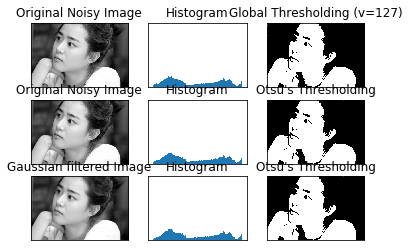

In [55]:
img = cv2.imread('1.jpg',0)

# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img,(5,5),0)
ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
	plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
	plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
	plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
	plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
	plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
	plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])


In [6]:
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('1.jpg')

In [4]:
img.shape

(354, 540, 3)

In [1]:
height, width = img.shape[:2]
shrink = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
zoom2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
zoom1 = cv2.resize(img, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(shrink.shape[0],shrink.shape[1]))
plt.imshow(shrink,'gray')

NameError: name 'img' is not defined

(<matplotlib.axes._subplots.AxesSubplot at 0x12bc4d350>,
 <matplotlib.image.AxesImage at 0x12bcb0650>)

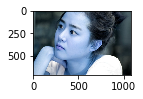

In [196]:
plt.subplot(3,3,1*3+2),plt.imshow(zoom1,'gray')

In [ ]:
plt.subplot(3,3,2*3+3),plt.imshow(zoom2,'gray')

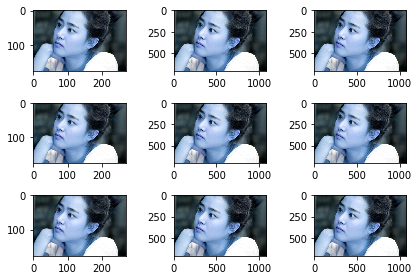

In [192]:
plt.tight_layout()

In [3]:
import matplotlib.pyplot as plt

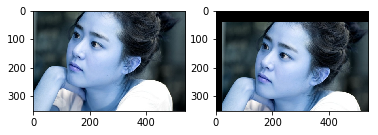

In [4]:
img = cv2.imread('1.jpg')
rows, cols = img.shape[:2]

# 변환 행렬, X축으로 10, Y축으로 20 이동
M = np.float32([[1,0,20],[0,1,40]])

dst = cv2.warpAffine(img, M,(cols, rows))

plt.subplot(1,2,1)
plt.imshow(img,'gray')

plt.subplot(1,2,2)
plt.imshow(dst,'gray')

In [5]:
rows, cols = img.shape[:2]

M= cv2.getRotationMatrix2D((cols/2, rows/2),90, 0.5)

In [6]:
M

array([[ 3.061617e-17,  5.000000e-01,  1.815000e+02],
       [-5.000000e-01,  3.061617e-17,  3.120000e+02]])

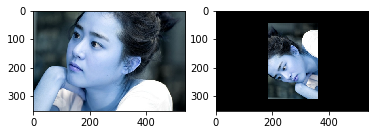

In [58]:
dst = cv2.warpAffine(img, M,(cols, rows))

plt.subplot(1,2,1)
plt.imshow(img,'gray')

plt.subplot(1,2,2)
plt.imshow(dst,'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x126a32050>,
 Text(0.5, 1.0, 'Affine'))

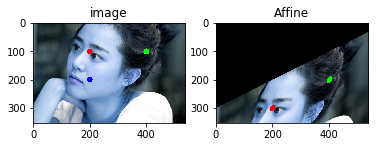

In [59]:
rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')

(<matplotlib.axes._subplots.AxesSubplot at 0x12466cc90>,
 Text(0.5, 1.0, 'Perspective'))

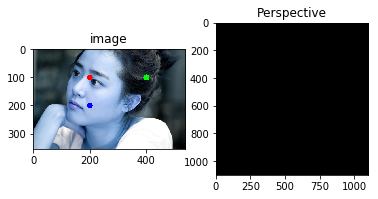

In [60]:
# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[504,1003],[243,1525],[1000,1000],[1280,1685]])

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (504,1003), 20, (255,0,0),-1)
cv2.circle(img, (243,1524), 20, (0,255,0),-1)
cv2.circle(img, (1000,1000), 20, (0,0,255),-1)
cv2.circle(img, (1280,1685), 20, (0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (1100,1100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')

In [61]:
img1 = cv2.imread('2.png')
img2 = cv2.imread('1.jpg')

rows, cols, channels = img1.shape
roi = img2[0:rows, 0:cols]

#mask를 만들기 위해서 img1을 gray로 변경후 binary image로 전환
#mask는 logo부분이 흰색(255), 바탕은 검은색(0)
#mask_inv는 logo부분이 검은색(0), 바탕은 흰색(255)

img2gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#bitwise_and 연산자는 둘다 0이 아닌 경우만 값을 통과 시킴.
#즉 mask가 검정색이 아닌 경우만 통과가 되기때문에 mask영역 이외는 모두 제거됨.
#아래 img1_fg의 경우는 bg가 제거 되고 fg(logo부분)만 남게 됨.
#img2_bg는 roi영역에서 logo부분이 제거되고 bg만 남게 됨.
img1_fg = cv2.bitwise_and(img1, img1, mask=mask)
img2_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

dst = cv2.add(img1_fg, img2_bg)
img2[0:rows, 0:cols] = dst

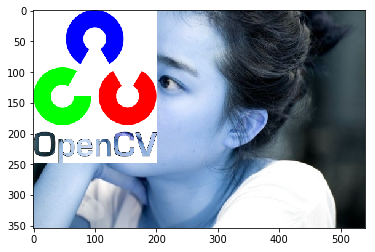

In [62]:
plt.imshow(img2)

(0, 255)

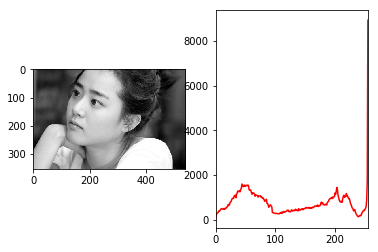

In [66]:
img1 = cv2.imread('1.jpg',0)
hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])

plt.subplot(121),plt.imshow(img1,'gray')
plt.subplot(122),plt.plot(hist1,color='r')
plt.xlim([0,255])

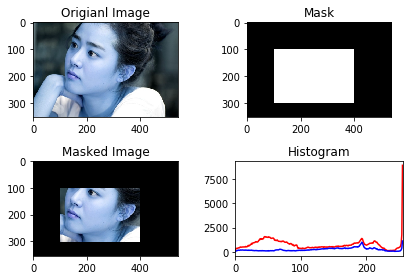

In [69]:
img = cv2.imread('1.jpg');

# mask생성
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,100:400] = 255

# 이미지에 mask가 적용된 결과
masked_img = cv2.bitwise_and(img,img,mask=mask)

# 원본 이미지의 히스토그램
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])

# mask를 적용한 히스트로그램
hist_mask = cv2.calcHist([img],[1],mask,[256],[0,256])

plt.subplot(221),plt.imshow(img,'gray'),plt.title('Origianl Image')
plt.subplot(222),plt.imshow(mask,'gray'),plt.title('Mask')
plt.subplot(223),plt.imshow(masked_img,'gray'),plt.title('Masked Image')

# red는 원본이미지 히스토그램, blue는 mask적용된 히스토그램
plt.subplot(224),plt.title('Histogram')
plt.plot(hist_full,color='r'),plt.plot(hist_mask,color='b')
plt.xlim([0,256])
plt.tight_layout()